In [23]:
using JLD2, FileIO
@load "potts_gibbs_final.jld2" potts_gibbs
@load "potts_gibbs_final_time.jld2" potts_gibbs_time
@load "potts_pgibbs_new_final.jld2" potts_poisson1
@load "potts_pgibbs01_new_final.jld2" potts_poisson01
@load "potts_pgibbs5_new_final.jld2" potts_poisson5
@load "potts_pgibbs_new_final_time.jld2" potts_poisson1_time
@load "potts_pgibbs01_new_final_time.jld2" potts_poisson01_time
@load "potts_pgibbs5_new_final_time.jld2" potts_poisson5_time

using PyPlot
using StatsBase

In [24]:
num_samples = 1000000
for i = 2:num_samples
    potts_gibbs_time[i] = sum(potts_gibbs_time[i-1]+potts_gibbs_time[i])
end
for i = 2:num_samples
    potts_poisson1_time[i] = sum(potts_poisson1_time[i-1]+potts_poisson1_time[i])
end
for i = 2:num_samples
    potts_poisson01_time[i] = sum(potts_poisson01_time[i-1]+potts_poisson01_time[i])
end
for i = 2:num_samples
    potts_poisson5_time[i] = sum(potts_poisson5_time[i-1]+potts_poisson5_time[i])
end


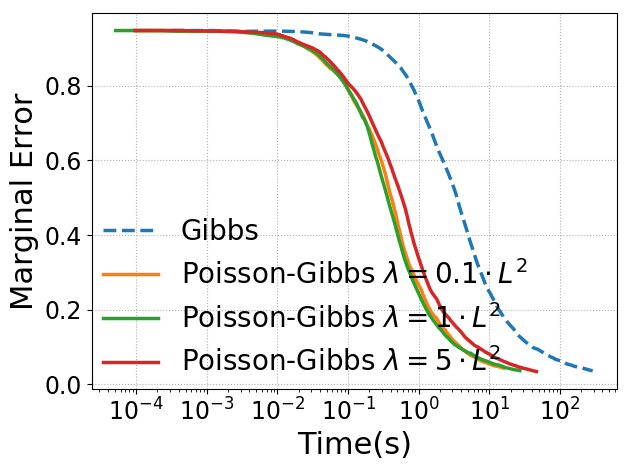

In [25]:
semilogx(potts_gibbs_time,potts_gibbs,"--", label="Gibbs", linewidth=2.5);
semilogx(potts_poisson01_time,potts_poisson01,label="Poisson-Gibbs \$\\lambda = 0.1 \\cdot L^2\$", linewidth=2.5);
semilogx(potts_poisson1_time,potts_poisson1,label="Poisson-Gibbs \$\\lambda = 1 \\cdot L^2\$", linewidth=2.5);
semilogx(potts_poisson5_time,potts_poisson5,label="Poisson-Gibbs \$\\lambda = 5 \\cdot L^2\$", linewidth=2.5);
legend(fontsize=20,loc=(0.0,0.0),framealpha=0.0);
grid(which="both", axis="y");
grid(linestyle="dotted");
xticks(fontsize=17)
yticks(fontsize=17)
xlabel("Time(s)"; size=22);
ylabel("Marginal Error"; size=22);
tight_layout()
savefig("gibbs_time.pdf");

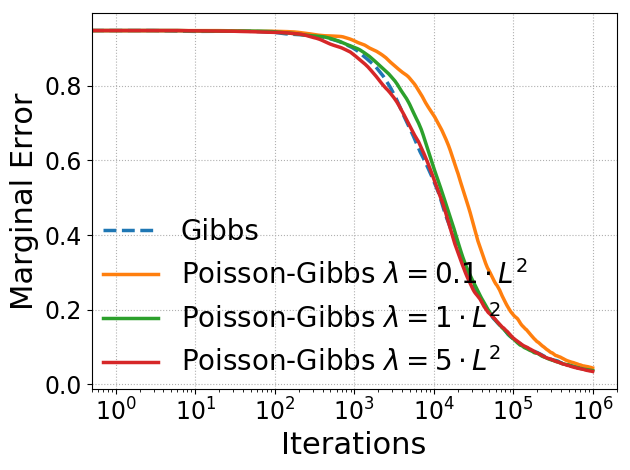

In [26]:
semilogx(potts_gibbs,"--", label="Gibbs", linewidth=2.5);
semilogx(potts_poisson01,label="Poisson-Gibbs \$\\lambda = 0.1 \\cdot L^2\$", linewidth=2.5);
semilogx(potts_poisson1,label="Poisson-Gibbs \$\\lambda = 1 \\cdot L^2\$", linewidth=2.5);
semilogx(potts_poisson5,label="Poisson-Gibbs \$\\lambda = 5 \\cdot L^2\$", linewidth=2.5);
legend(fontsize=20,loc=(0.0,0.0),framealpha=0.0);
grid(which="both", axis="y");
grid(linestyle="dotted");

xlabel("Iterations"; size=22);
ylabel("Marginal Error"; size=22);
xticks(fontsize=17)
yticks(fontsize=17)
tight_layout()
savefig("gibbs_iters.pdf");